<a href="https://colab.research.google.com/github/LuanLindolfo/Visao_Computacional/blob/main/acidente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy #para computação numérica, alta performance e ferramentas para operações matemáticas.
!pip -q install plotly #gráficos e dashboards dinâmicos
!pip -q install yellowbrick #visualização de machine learning para avaliar e diagnosticar modelos de forma visual

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
acidente = pd.read_csv('/content/drive/MyDrive/Ibama/acidente.csv', encoding='latin-1', sep=';')
#A codificação padrão (UTF-8) não conseguiu lidar com alguns caracteres no arquivo
acidente

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,652493.0,2025-01-01,quarta-feira,06:20:00,SP,116,225,GUARULHOS,Reação tardia ou ineficiente do condutor,Tombamento,...,0,0,1,1,2,"-23,48586772","-46,54075317",SPRF-SP,DEL01-SP,UOP01-DEL01-SP
1,652519.0,2025-01-01,quarta-feira,07:50:00,CE,116,"546,2",PENAFORTE,Pista esburacada,Colisão frontal,...,0,1,4,1,6,"-7,812288","-39,08333306",SPRF-CE,DEL05-CE,UOP03-DEL05-CE
2,652522.0,2025-01-01,quarta-feira,08:45:00,PR,369,"88,2",CORNELIO PROCOPIO,Reação tardia ou ineficiente do condutor,Colisão traseira,...,0,2,0,3,2,"-23,182565","-50,637228",SPRF-PR,DEL07-PR,UOP05-DEL07-PR
3,652544.0,2025-01-01,quarta-feira,11:00:00,PR,116,74,CAMPINA GRANDE DO SUL,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,...,0,4,0,1,2,"-25,36517687","-49,04223028",SPRF-PR,DEL01-PR,UOP02-DEL01-PR
4,652549.0,2025-01-01,quarta-feira,09:30:00,MG,251,471,FRANCISCO SA,Velocidade Incompatível,Colisão frontal,...,1,1,2,2,4,"-16,46801304","-43,43121303",SPRF-MG,DEL12-MG,UOP01-DEL12-MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34700,705679.0,2025-05-23,sexta-feira,17:07:00,BA,324,600,SIMOES FILHO,Ausência de reação do condutor,Queda de ocupante de veículo,...,0,0,0,1,1,"-12,77075662","-38,42161417",SPRF-BA,DEL01-BA,UOP01-DEL01-BA
34701,705735.0,2025-06-29,domingo,08:30:00,SP,381,59,MAIRIPORA,Manobra de mudança de faixa,Colisão lateral mesmo sentido,...,0,1,0,1,2,"-23,28048922","-46,58644867",SPRF-SP,DEL03-SP,UOP01-DEL03-SP
34702,705751.0,2025-06-05,quinta-feira,18:25:00,RJ,465,10,SEROPEDICA,Demais falhas mecânicas ou elétricas,Colisão lateral mesmo sentido,...,0,1,0,1,2,"-22,8065671","-43,6390686",SPRF-RJ,DEL06-RJ,UOP02-DEL06-RJ
34703,705809.0,2025-05-01,quinta-feira,19:50:00,SE,101,"98,6",SAO CRISTOVAO,Velocidade Incompatível,Colisão traseira,...,0,0,1,0,2,"-10,930556","-37,185833",SPRF-SE,DEL02-SE,UOP01-DEL02-SE


In [5]:
acidente.head(10)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,652493.0,2025-01-01,quarta-feira,06:20:00,SP,116,225,GUARULHOS,Reação tardia ou ineficiente do condutor,Tombamento,...,0,0,1,1,2,"-23,48586772","-46,54075317",SPRF-SP,DEL01-SP,UOP01-DEL01-SP
1,652519.0,2025-01-01,quarta-feira,07:50:00,CE,116,"546,2",PENAFORTE,Pista esburacada,Colisão frontal,...,0,1,4,1,6,"-7,812288","-39,08333306",SPRF-CE,DEL05-CE,UOP03-DEL05-CE
2,652522.0,2025-01-01,quarta-feira,08:45:00,PR,369,"88,2",CORNELIO PROCOPIO,Reação tardia ou ineficiente do condutor,Colisão traseira,...,0,2,0,3,2,"-23,182565","-50,637228",SPRF-PR,DEL07-PR,UOP05-DEL07-PR
3,652544.0,2025-01-01,quarta-feira,11:00:00,PR,116,74,CAMPINA GRANDE DO SUL,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,...,0,4,0,1,2,"-25,36517687","-49,04223028",SPRF-PR,DEL01-PR,UOP02-DEL01-PR
4,652549.0,2025-01-01,quarta-feira,09:30:00,MG,251,471,FRANCISCO SA,Velocidade Incompatível,Colisão frontal,...,1,1,2,2,4,"-16,46801304","-43,43121303",SPRF-MG,DEL12-MG,UOP01-DEL12-MG
5,652569.0,2025-01-01,quarta-feira,10:40:00,MT,70,669,CACERES,Transitar na contramão,Colisão frontal,...,0,1,2,0,5,"-16,04148578","-57,25884017",SPRF-MT,DEL03-MT,UOP02-DEL03-MT
6,652573.0,2025-01-01,quarta-feira,12:23:00,RS,116,376,TAPES,Ausência de reação do condutor,Saída de leito carroçável,...,0,0,1,1,2,"-30,739714","-51,62594",SPRF-RS,DEL02-RS,UOP02-DEL02-RS
7,652617.0,2025-01-01,quarta-feira,17:45:00,SC,101,"207,4",SAO JOSE,Ausência de reação do condutor,Colisão traseira,...,0,1,0,1,2,"-27,60001226","-48,6226467",SPRF-SC,DEL01-SC,UOP01-DEL01-SC
8,652625.0,2025-01-01,quarta-feira,18:40:00,MG,116,"708,5",MURIAE,Velocidade Incompatível,Tombamento,...,0,0,1,0,2,"-21,16328873","-42,37968988",SPRF-MG,DEL07-MG,UOP02-DEL07-MG
9,652648.0,2025-01-01,quarta-feira,17:00:00,PE,407,"7,4",AFRANIO,Demais falhas mecânicas ou elétricas,Incêndio,...,0,2,0,0,1,"-8,47503105","-41,0137105",SPRF-PE,DEL06-PE,UOP02-DEL06-PE


In [6]:
acidente.tail(10)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
34695,705430.0,2025-05-30,sexta-feira,18:00:00,GO,70,472,ARAGARCAS,Ultrapassagem Indevida,Colisão lateral mesmo sentido,...,1,0,2,1,3,"-15,89615271","-52,24952728",SPRF-GO,DEL04-GO,UOP02-DEL04-GO
34696,705434.0,2025-06-30,segunda-feira,07:00:00,GO,364,5,SAO SIMAO,Reação tardia ou ineficiente do condutor,Atropelamento de Pedestre,...,1,1,0,2,3,"-19,01486646","-50,5413797",SPRF-GO,DEL05-GO,UOP02-DEL05-GO
34697,705458.0,2025-06-11,quarta-feira,19:30:00,GO,60,28,ALEXANIA,Animais na Pista,Saída de leito carroçável,...,0,0,0,1,1,"-16,10164","-48,46178",SPRF-DF,DEL03-DF,UOP01-DEL03-DF
34698,705505.0,2025-04-03,quinta-feira,10:00:00,PR,277,"563,4",CASCAVEL,Acessar a via sem observar a presença dos outr...,Colisão transversal,...,1,1,0,2,2,"-25,04679","-53,24072",SPRF-PR,DEL04-PR,UOP04-DEL04-PR
34699,705507.0,2025-04-06,domingo,19:30:00,GO,40,2,VALPARAISO DE GOIAS,Manobra de mudança de faixa,Colisão traseira,...,0,0,1,1,2,"-16,06393704","-47,98371774",SPRF-DF,DEL01-DF,UOP01-DEL01-DF
34700,705679.0,2025-05-23,sexta-feira,17:07:00,BA,324,600,SIMOES FILHO,Ausência de reação do condutor,Queda de ocupante de veículo,...,0,0,0,1,1,"-12,77075662","-38,42161417",SPRF-BA,DEL01-BA,UOP01-DEL01-BA
34701,705735.0,2025-06-29,domingo,08:30:00,SP,381,59,MAIRIPORA,Manobra de mudança de faixa,Colisão lateral mesmo sentido,...,0,1,0,1,2,"-23,28048922","-46,58644867",SPRF-SP,DEL03-SP,UOP01-DEL03-SP
34702,705751.0,2025-06-05,quinta-feira,18:25:00,RJ,465,10,SEROPEDICA,Demais falhas mecânicas ou elétricas,Colisão lateral mesmo sentido,...,0,1,0,1,2,"-22,8065671","-43,6390686",SPRF-RJ,DEL06-RJ,UOP02-DEL06-RJ
34703,705809.0,2025-05-01,quinta-feira,19:50:00,SE,101,"98,6",SAO CRISTOVAO,Velocidade Incompatível,Colisão traseira,...,0,0,1,0,2,"-10,930556","-37,185833",SPRF-SE,DEL02-SE,UOP01-DEL02-SE
34704,705883.0,2025-06-22,domingo,12:30:00,MG,354,764,ITAMONTE,Velocidade Incompatível,Saída de leito carroçável,...,0,0,0,1,1,"-22,34293799","-44,81667548",SPRF-MG,DEL17-MG,UOP01-DEL17-MG


In [7]:
acidente.describe()

,id,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
count,34705.000000,34705.000000,34705.000000,34705.000000,34705.000000,34705.000000,34705.000000,34705.000000,34705.000000,34705.000000
mean,676782.446189,208.220141,2.591586,0.083129,0.879931,0.273448,1.049042,0.389742,1.153378,1.993805
std,16068.869096,128.163445,2.163653,0.333557,1.018539,0.595264,1.799228,0.801364,1.102338,1.084485
min,652468.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,662347.000000,101.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,671864.000000,155.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,692579.000000,316.000000,3.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
max,705883.000000,495.000000,71.000000,9.000000,41.000000,14.000000,71.000000,18.000000,49.000000,31.000000


In [8]:
acidente[acidente['pessoas']<=1]

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
16,652703.0,2025-01-02,quinta-feira,07:15:00,PB,230,"105,6",MOGEIRO,Condutor Dormindo,Saída de leito carroçável,...,0,0,0,1,1,"-7,2075","-35,5248",SPRF-PB,DEL01-PB,UOP02-DEL01-PB
28,652796.0,2025-01-02,quinta-feira,14:00:00,RS,287,316,MATA,Condutor Dormindo,Saída de leito carroçável,...,1,0,0,1,1,"-29,65140716","-54,53287505",SPRF-RS,DEL09-RS,UOP01-DEL09-RS
59,652950.0,2025-01-03,sexta-feira,14:30:00,MG,40,590,ITABIRITO,Velocidade Incompatível,Colisão com objeto,...,0,0,0,1,1,"-20,36807799","-43,90982881",SPRF-MG,DEL01-MG,UOP02-DEL01-MG
77,653058.0,2025-01-04,sábado,02:46:00,RJ,116,313,RESENDE,Condutor Dormindo,Saída de leito carroçável,...,1,0,0,1,1,"-22,45998766","-44,46237202",SPRF-RJ,DEL07-RJ,UOP02-DEL07-RJ
82,653072.0,2025-01-04,sábado,03:40:00,RS,285,"182,8",CAPAO BONITO DO SUL,Ausência de reação do condutor,Saída de leito carroçável,...,1,0,0,1,1,"-28,290833","-51,422482",SPRF-RS,DEL08-RS,UOP05-DEL08-RS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34679,704792.0,2025-06-14,sábado,00:40:00,SP,116,157,SAO JOSE DOS CAMPOS,Ausência de reação do condutor,Colisão com objeto,...,0,1,0,0,1,"-23,25601861","-45,94472766",SPRF-SP,DEL02-SP,UOP01-DEL02-SP
34690,705159.0,2025-06-22,domingo,12:20:00,PR,277,"6,7",PARANAGUA,Ausência de reação do condutor,Tombamento,...,0,0,0,1,1,"-25,515068","-48,522698",SPRF-PR,DEL01-PR,UOP05-DEL01-PR
34697,705458.0,2025-06-11,quarta-feira,19:30:00,GO,60,28,ALEXANIA,Animais na Pista,Saída de leito carroçável,...,0,0,0,1,1,"-16,10164","-48,46178",SPRF-DF,DEL03-DF,UOP01-DEL03-DF
34700,705679.0,2025-05-23,sexta-feira,17:07:00,BA,324,600,SIMOES FILHO,Ausência de reação do condutor,Queda de ocupante de veículo,...,0,0,0,1,1,"-12,77075662","-38,42161417",SPRF-BA,DEL01-BA,UOP01-DEL01-BA


In [9]:
acidente[acidente['pessoas']>=71]

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
22687,673084.0,2025-04-12,sábado,01:50:00,SP,116,523,BARRA DO TURVO,Demais falhas mecânicas ou elétricas,Incêndio,...,0,71,0,0,1,"-24,92069047","-48,25950623",SPRF-SP,DEL05-SP,UOP02-DEL05-SP


#Visualização de dados

In [10]:
np.unique(acidente['causa_acidente'], return_counts=True)#contagem no registro de cada uma das classes
#os registros da classe

#sns -> mostra mais a relação de variáveis de forma em análise gráfica, e oferece uma interface de alto nível para criar gráficos estatísticos atraentes e informativos.
#plt -> uma biblioteca de visualização de dados mais fundamental e de baixo nível.

(array(['Acessar a via sem observar a presença dos outros veículos',
        'Acesso irregular', 'Acostamento em desnível',
        'Acumulo de areia ou detritos sobre o pavimento',
        'Acumulo de água sobre o pavimento',
        'Acumulo de óleo sobre o pavimento',
        'Afundamento ou ondulação no pavimento', 'Animais na Pista',
        'Ausência de reação do condutor', 'Ausência de sinalização',
        'Avarias e/ou desgaste excessivo no pneu',
        'Carga excessiva e/ou mal acondicionada', 'Chuva',
        'Condutor Dormindo',
        'Condutor deixou de manter distância do veículo da frente',
        'Condutor desrespeitou a iluminação vermelha do semáforo',
        'Condutor usando celular', 'Conversão proibida', 'Curva acentuada',
        'Declive acentuado',
        'Deficiência do Sistema de Iluminação/Sinalização',
        'Deixar de acionar o farol da motocicleta (ou similar)',
        'Demais Fenômenos da natureza',
        'Demais falhas mecânicas ou elétricas'

<Axes: xlabel='feridos_graves', ylabel='count'>

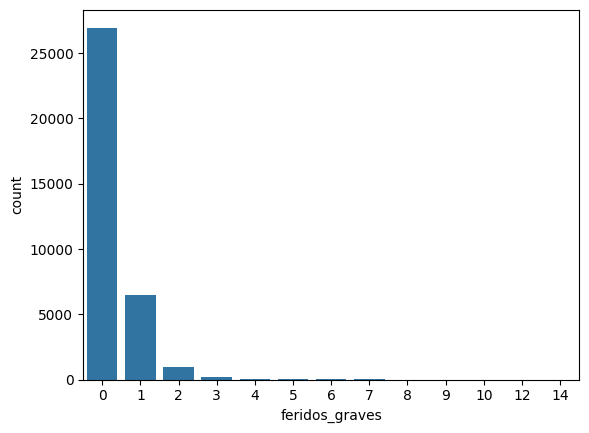

In [11]:
sns.countplot(x = acidente['feridos_graves'])

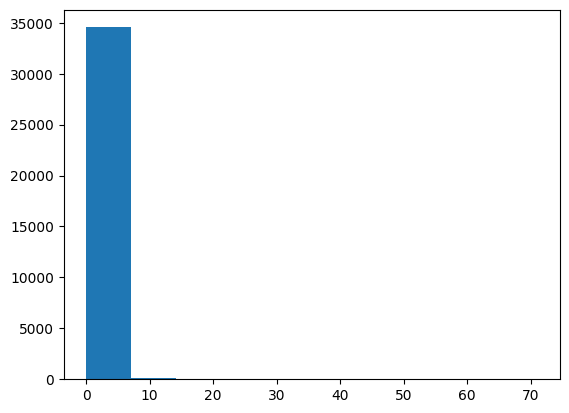

In [12]:
plt.hist(x = acidente['ilesos']);#histograma de ilesos

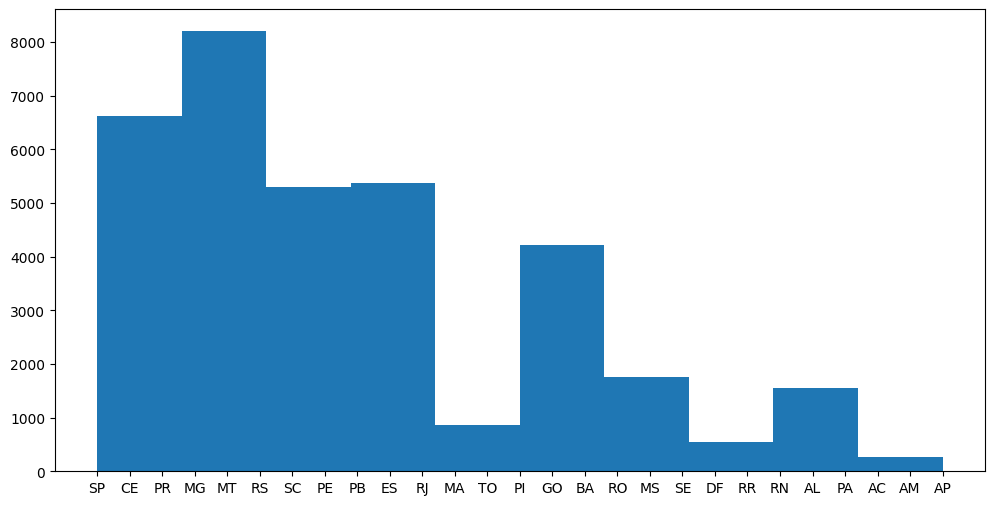

In [13]:
plt.figure(figsize=(12, 6)) # Define o tamanho da figura (largura, altura)
plt.hist(x = acidente['uf']);#histograma de ilesos

<Axes: xlabel='feridos', ylabel='count'>

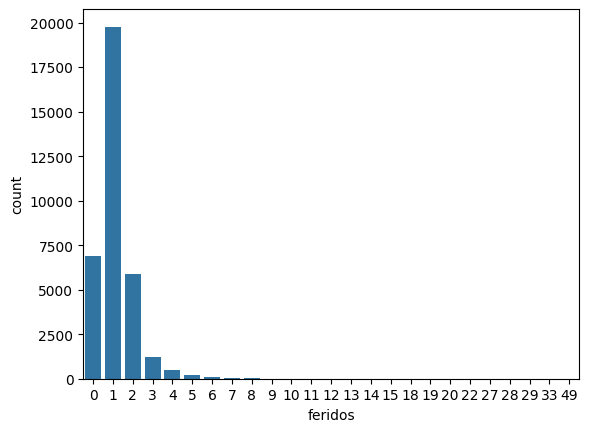

In [14]:
sns.countplot(x = acidente['feridos'])

<Axes: xlabel='ignorados', ylabel='count'>

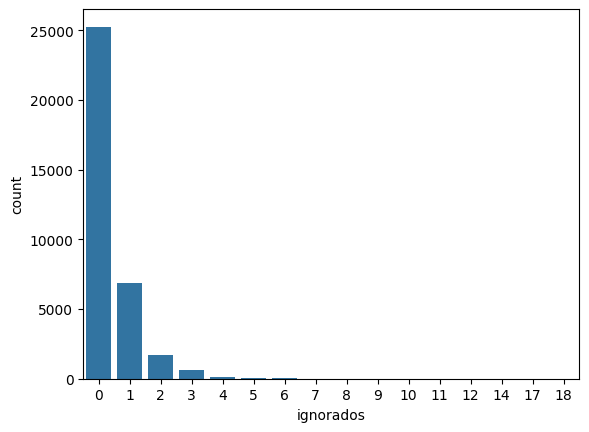

In [15]:
sns.countplot(x = acidente['ignorados'])

In [16]:
#scatter - grafico em dispersao
grafico = px.scatter_matrix(acidente, dimensions=['veiculos', 'feridos_graves', 'ilesos', 'condicao_metereologica', 'fase_dia', 'tipo_acidente'], color = 'feridos')
#criando grafico dinamico - importante ara perceber outliers
#combina no eixo x e y
#color = 'default - cor com base nos dados de default (0 e 1), que diz se a pessoa paga ou nao paga o empréstimo
#base_credit - origem do arquivo
#juncao de atributos em graficos
#[] - atributos da visualizacao nos gráficos
grafico.update_layout(height=800, width=1600) # Ajuste a altura e largura conforme necessário
grafico.show()

#Tratamento de valores inconsistentes (análise em dados errados e a correção destes valores)

In [17]:
acidente.describe()

,id,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
count,34705.000000,34705.000000,34705.000000,34705.000000,34705.000000,34705.000000,34705.000000,34705.000000,34705.000000,34705.000000
mean,676782.446189,208.220141,2.591586,0.083129,0.879931,0.273448,1.049042,0.389742,1.153378,1.993805
std,16068.869096,128.163445,2.163653,0.333557,1.018539,0.595264,1.799228,0.801364,1.102338,1.084485
min,652468.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,662347.000000,101.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,671864.000000,155.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,692579.000000,316.000000,3.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
max,705883.000000,495.000000,71.000000,9.000000,41.000000,14.000000,71.000000,18.000000,49.000000,31.000000


In [18]:
#exemplo de outlier
acidente[acidente['pessoas']>=71]
#mesmo que seja um número alto e não tão comum, trata-se de um evento real, nesse caso, mantendo ele, é possível analisar o espectro geral de acidentes

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
22687,673084.0,2025-04-12,sábado,01:50:00,SP,116,523,BARRA DO TURVO,Demais falhas mecânicas ou elétricas,Incêndio,...,0,71,0,0,1,"-24,92069047","-48,25950623",SPRF-SP,DEL05-SP,UOP02-DEL05-SP


Valores faltantes

In [19]:
acidente.isnull()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34700,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
34701,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
34702,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
34703,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
acidente.isnull().sum()

,0
id,0
data_inversa,0
dia_semana,0
horario,0
uf,0
br,0
km,0
municipio,0
causa_acidente,0
tipo_acidente,0


#Divisão entre previsores e classe

In [21]:
#separando previsores e variável alvo
X_acidente = acidente[['veiculos', 'condicao_metereologica', 'feridos_graves', 'fase_dia', 'ilesos', 'feridos', 'tipo_acidente']]
y_acidente = acidente['causa_acidente']

print("Variáveis previsoras (X_acidente) shape:", X_acidente.shape)
print("Variável alvo (y_acidente) shape:", y_acidente.shape)

type(X_acidente)#vendo o tipo
type(y_acidente)#vendo o tipo

Variáveis previsoras (X_acidente) shape: (34705, 7)
Variável alvo (y_acidente) shape: (34705,)


pandas.core.series.Series

#OneHotEncoder -> Tratar valores categoricos

In [22]:
from sklearn.preprocessing import LabelEncoder
#Biblioteca para conversao de dados categoricos parta numericos sendo possivel tratar os dados

In [23]:
label_encoder_teste = LabelEncoder()#objeto da classe

In [24]:
print(X_acidente[['condicao_metereologica', 'fase_dia', 'tipo_acidente']])

      condicao_metereologica     fase_dia                  tipo_acidente
0                  Céu Claro    Pleno dia                     Tombamento
1                  Céu Claro    Pleno dia                Colisão frontal
2                        Sol    Pleno dia               Colisão traseira
3                  Céu Claro    Pleno dia      Saída de leito carroçável
4                      Chuva    Pleno dia                Colisão frontal
...                      ...          ...                            ...
34700               Ignorado    Pleno dia   Queda de ocupante de veículo
34701              Céu Claro    Pleno dia  Colisão lateral mesmo sentido
34702              Céu Claro  Plena Noite  Colisão lateral mesmo sentido
34703                Nublado  Plena Noite               Colisão traseira
34704              Céu Claro    Pleno dia      Saída de leito carroçável

[34705 rows x 3 columns]


In [25]:
print(y_acidente)

0        Reação tardia ou ineficiente do condutor
1                                Pista esburacada
2        Reação tardia ou ineficiente do condutor
3        Reação tardia ou ineficiente do condutor
4                         Velocidade Incompatível
                           ...                   
34700              Ausência de reação do condutor
34701                 Manobra de mudança de faixa
34702        Demais falhas mecânicas ou elétricas
34703                     Velocidade Incompatível
34704                     Velocidade Incompatível
Name: causa_acidente, Length: 34705, dtype: object


In [26]:
#criando um label_encoder para cada um dos atributos
label_encoder_condicao = LabelEncoder()
label_encoder_dia = LabelEncoder()
label_encoder_tipo = LabelEncoder()
label_encoder_causa = LabelEncoder()

In [27]:
#acessando a variavel e aplicando o label_encoder para transformar
#para as colunas nao presentes, e pq ja sao numericas
X_acidente['condicao_metereologica'] = label_encoder_condicao.fit_transform(X_acidente['condicao_metereologica'])
X_acidente['fase_dia'] = label_encoder_dia.fit_transform(X_acidente['fase_dia'])
X_acidente['tipo_acidente'] = label_encoder_tipo.fit_transform(X_acidente['tipo_acidente'])
y_acidente = label_encoder_causa.fit_transform(y_acidente) #se trata de um pandas por ser uma serie com coluna unica e nao um dataframe com varias colunas

/tmp/ipython-input-27-3229673781.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-27-3229673781.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-27-3229673781.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
print(X_acidente[['condicao_metereologica', 'fase_dia', 'tipo_acidente']])

       condicao_metereologica  fase_dia  tipo_acidente
0                           1         3             16
1                           1         3              4
2                           6         3              8
3                           1         3             14
4                           0         3              4
...                       ...       ...            ...
34700                       3         3             13
34701                       1         3              5
34702                       1         2              5
34703                       5         2              8
34704                       1         3             14

[34705 rows x 3 columns]


In [29]:
print(y_acidente)

[51 48 51 ... 23 67 67]


#Escalonamento dos valores

In [30]:
from sklearn.preprocessing import StandardScaler #para escalonamento de valores - padronizacao
scaler_acidente = StandardScaler() #objeto
X_acidente = scaler_acidente.fit_transform(X_acidente)#tranformando e escalonando - tem + duas dimensoes, por isso o escalonamento -> usado para escalar as features (variáveis preditoras)
X_acidente[0]

array([ 0.00571254, -0.50445849, -0.45937877,  0.7446532 , -0.58305954,
       -0.13914119,  1.72639413])

# Divisão das bases em treinamento e teste

In [31]:
from sklearn.model_selection import train_test_split #importacao das bases

# Dividir os dados transformados (previsores) e a variável alvo
# test_size=0.25 -> 25% dos dados pra teste e 75% para treino
# random_state=0 garante que a divisão seja a mesma toda vez que o código for executado -> não randomiza nada
X_treino_acidente, X_teste_acidente, y_treino_acidente, y_teste_acidente = train_test_split(X_acidente, y_acidente, test_size=0.25, random_state=0)

print("treino (previsores):", X_treino_acidente.shape)
print("teste (previsores):", X_teste_acidente.shape)
print("treino (alvo):", y_treino_acidente.shape)
print("teste (alvo):", y_teste_acidente.shape)

treino (previsores): (26028, 7)
teste (previsores): (8677, 7)
treino (alvo): (26028,)
teste (alvo): (8677,)


#Árvore de decisão - não é bom pois os dados são massivos e a árvore fica extensa e sem poder ler

In [32]:
#from sklearn.tree import DecisionTreeClassifier

In [33]:
#X_treino_acidente

In [34]:
#y_treino_acidente

In [35]:
#Criando árvore de decisão
##arvore_acidente = DecisionTreeClassifier(criterion='entropy')
#DecisionTreeClassifier objeto que foi importado
#critério - criterion='entropy'
##arvore_acidente.fit(X_treino_acidente, y_treino_acidente)
#.fit - encaixar os dados no algoritmo
#gerando todos os calculos

In [36]:
#arvore_acidente.feature_importances_
#.feature_importances_ - retorna a importancia de cada um dos atributos
#ou seja, o que tem o maior ganho d e informação

In [37]:
#arvore_acidente.classes_
#lista de valores das classes
#no caso, os tipos de acidente

In [38]:
##from sklearn import tree
#gerando o grafico da arvore de decisao
##previsores = ['veiculos', 'condicao_metereologica', 'feridos_graves', 'fase_dia', 'ilesos', 'feridos', 'tipo_acidente']
#para melhor visualizacao, atributos em lista
##figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
#definindo uma figura
##tree.plot_tree(arvore_acidente, feature_names=previsores, class_names = label_encoder_causa.classes_, filled=True);#passando o
#filled=True - preenchendo o grafico para melhor visualizacao
#importanto tudo no metodo da arvore
#class_names = arvore_risco_credito.classes_ - pra falar se o risco é alto, moderado ou baixo

#Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
#.ensemble - unir varios algoritmos em um so pacote

In [40]:
X_treino_acidente.shape, y_treino_acidente.shape

((26028, 7), (26028,))

In [41]:
X_teste_acidente.shape, y_teste_acidente.shape

((8677, 7), (8677,))

In [42]:
random_forest_acidente = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state = 0)
#n_estimators=40 - numero de arvores de decisao que vai criar - voto da maioria
#100 é o padrão
#Nem sempre a maior quantidade de ávores significa parametros melhores
random_forest_acidente.fit(X_treino_acidente, y_treino_acidente)
#passando os atrributos como parametros

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [43]:
previsoes = random_forest_acidente.predict(X_teste_acidente) #gerando as previsoes
previsoes

array([ 8,  8, 14, ...,  0, 37,  8])

In [44]:
y_teste_acidente

array([13, 51, 51, ...,  0, 23,  8])

In [45]:
from sklearn.metrics import accuracy_score, classification_report
#passando as respoista reais e as previsoes para a metrica
accuracy_score(y_teste_acidente, previsoes)

0.2746340901233145

In [46]:
##from yellowbrick.classifier import ConfusionMatrix
#matriz de confusao
####cm = ConfusionMatrix(random_forest_acidente)
##cm.fit(X_treino_acidente, y_treino_acidente)
##cm.score(X_teste_acidente, y_teste_acidente)
#encaixando os atributos como parametro e verificando as metricas

In [63]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, recall_score
#passando as respoista reais e as previsoes para a metrica
print("Accuracy:", accuracy_score(y_teste_acidente, previsoes))
print("F1 Score:", f1_score(y_teste_acidente, previsoes, average='weighted')) # Use weighted average for multiclass
print("Recall Score:", recall_score(y_teste_acidente, previsoes, average='weighted')) # Use weighted average for multiclass
print(classification_report(y_teste_acidente, previsoes))

Accuracy: 0.30056471130575085
F1 Score: 0.24495124132671883
Recall Score: 0.30056471130575085
              precision    recall  f1-score   support

           0       0.46      0.69      0.56       826
           1       0.00      0.00      0.00        91
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00        33
           4       0.00      0.00      0.00        63
           5       0.00      0.00      0.00        34
           6       0.00      0.00      0.00        33
           7       0.90      0.66      0.76       175
           8       0.25      0.44      0.32      1355
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00       125
          11       0.00      0.00      0.00        30
          12       0.21      0.54      0.30       134
          13       0.00      0.00      0.00       248
          14       0.27      0.02      0.04       535
          15       0.00      0.00      0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#SVM

In [48]:
from sklearn.svm import SVC #svc - nome da classe a ser importada

In [49]:
X_treino_acidente.shape, y_treino_acidente.shape #registros treinamento

((26028, 7), (26028,))

In [50]:
X_teste_acidente.shape, y_teste_acidente.shape #registros de teste

((8677, 7), (8677,))

In [51]:
svm_credit = SVC(kernel='rbf', random_state=1, C = 2.0) # 2 -> 4
#kernel='rbf' - tipo do Kernel - base de dados diferentes requerem tipos diferentes de Kernel
#faz o teste e vê o melhor
#random_state=1 - para que sempre que execute tenha o mesmo resultado
#C = 2.0 - maior o valor, mais perfeita a divisão dos dados
svm_credit.fit(X_treino_acidente, y_treino_acidente)
#treinamento

SVC(C=2.0, random_state=1)

In [52]:
previsoes = svm_credit.predict(X_teste_acidente)#treinamento
previsoes

array([ 8,  0,  0, ...,  0, 37, 51])

In [53]:
y_teste_acidente#respostas reais
#para fins de comparação

array([13, 51, 51, ...,  0, 23,  8])

In [54]:
from sklearn.metrics import accuracy_score, classification_report#metricas
accuracy_score(y_teste_acidente, previsoes)

0.25216088509853635

In [64]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, recall_score#metricas
print("Accuracy:", accuracy_score(y_teste_acidente, previsoes))
print("F1 Score:", f1_score(y_teste_acidente, previsoes, average='weighted')) # Use weighted average for multiclass
print("Recall Score:", recall_score(y_teste_acidente, previsoes, average='weighted')) # Use weighted average for multiclass
print(classification_report(y_teste_acidente, previsoes))

Accuracy: 0.30056471130575085
F1 Score: 0.24495124132671883
Recall Score: 0.30056471130575085
              precision    recall  f1-score   support

           0       0.46      0.69      0.56       826
           1       0.00      0.00      0.00        91
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00        33
           4       0.00      0.00      0.00        63
           5       0.00      0.00      0.00        34
           6       0.00      0.00      0.00        33
           7       0.90      0.66      0.76       175
           8       0.25      0.44      0.32      1355
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00       125
          11       0.00      0.00      0.00        30
          12       0.21      0.54      0.30       134
          13       0.00      0.00      0.00       248
          14       0.27      0.02      0.04       535
          15       0.00      0.00      0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# Redes neurais artificiais

In [56]:
from sklearn.neural_network import MLPClassifier
#MLPClassifier - Multi Layer Perceptron

In [57]:
# 3 -> 100 -> 100 -> 1
# 3 -> 2 -> 2 -> 1
# o 3 vem do treinamento, 3 atributos e a saída vem da sapida do teste, 0 ou 1 (paga ou nao)
rede_neural_credit = MLPClassifier(max_iter=1500, verbose=True, tol=0.3,
                                   #max_iter=1500 - para iteracoes para covergir o erro
                                   #verbose=True - para que o algoritmo mostre as mensagem epoca por epoca
                                   #loss - erro (objetivo é diminuir)
#configurado para ir ate a 1500, mas para na 742, nao precisa ir ate 1500
#Iteration 742, loss = 0.00212129
#Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
#pelo motivo de ele não conseguir melhorar mais o erro, já foi o máximo
#tol=0.0000100 - para que ele possa ir mais, só configurar o parâmetro tol
                                   solver = 'adam', activation = 'tanh',
                                   #activation = 'relu'- para cenarios mais complexos, no lugar do sigmoide
                                   hidden_layer_sizes = (64, 64, 64))
                                    #nem sempre uma grande quantidade de neurônios na camada oculta, significa melhor taxa de acerto
#hidden_layer_sizes = (20,20) - duas camadas ocultas e cada uma com 20 neurônios
rede_neural_credit.fit(X_treino_acidente, y_treino_acidente)
#faz ajuste dos pesos e encaixa os dados

Iteration 1, loss = 3.09537683
Iteration 2, loss = 2.76090094
Iteration 3, loss = 2.67491898
Iteration 4, loss = 2.61522834
Iteration 5, loss = 2.56132955
Iteration 6, loss = 2.51000185
Iteration 7, loss = 2.46896830
Iteration 8, loss = 2.44247718
Iteration 9, loss = 2.42220123
Iteration 10, loss = 2.40547826
Iteration 11, loss = 2.39262393
Iteration 12, loss = 2.38161091
Iteration 13, loss = 2.37206196
Training loss did not improve more than tol=0.300000 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='tanh', hidden_layer_sizes=(64, 64, 64), max_iter=1500,
              tol=0.3, verbose=True)

In [58]:
previsoes = rede_neural_credit.predict(X_teste_acidente)#previsoes
previsoes

array([ 8, 14,  8, ...,  0,  8,  8])

In [59]:
y_teste_acidente

array([13, 51, 51, ...,  0, 23,  8])

In [60]:
from sklearn.metrics import accuracy_score, classification_report#metricas
accuracy_score(y_teste_acidente, previsoes)

0.30056471130575085

In [65]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, recall_score#metricas
print("Accuracy:", accuracy_score(y_teste_acidente, previsoes))
print("F1 Score:", f1_score(y_teste_acidente, previsoes, average='weighted')) # Use weighted average for multiclass
print("Recall Score:", recall_score(y_teste_acidente, previsoes, average='weighted')) # Use weighted average for multiclass
print(classification_report(y_teste_acidente, previsoes))

Accuracy: 0.30056471130575085
F1 Score: 0.24495124132671883
Recall Score: 0.30056471130575085
              precision    recall  f1-score   support

           0       0.46      0.69      0.56       826
           1       0.00      0.00      0.00        91
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00        33
           4       0.00      0.00      0.00        63
           5       0.00      0.00      0.00        34
           6       0.00      0.00      0.00        33
           7       0.90      0.66      0.76       175
           8       0.25      0.44      0.32      1355
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00       125
          11       0.00      0.00      0.00        30
          12       0.21      0.54      0.30       134
          13       0.00      0.00      0.00       248
          14       0.27      0.02      0.04       535
          15       0.00      0.00      0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [67]:
metrics = {
    'Random Forest': {
        'Accuracy': accuracy_score(y_teste_acidente, random_forest_acidente.predict(X_teste_acidente)),
        'F1 Score': f1_score(y_teste_acidente, random_forest_acidente.predict(X_teste_acidente), average='weighted'),
        'Recall Score': recall_score(y_teste_acidente, random_forest_acidente.predict(X_teste_acidente), average='weighted')
    },
    'SVM': {
        'Accuracy': accuracy_score(y_teste_acidente, svm_credit.predict(X_teste_acidente)),
        'F1 Score': f1_score(y_teste_acidente, svm_credit.predict(X_teste_acidente), average='weighted'),
        'Recall Score': recall_score(y_teste_acidente, svm_credit.predict(X_teste_acidente), average='weighted')
    },
    'Neural Network': {
        'Accuracy': accuracy_score(y_teste_acidente, rede_neural_credit.predict(X_teste_acidente)),
        'F1 Score': f1_score(y_teste_acidente, rede_neural_credit.predict(X_teste_acidente), average='weighted'),
        'Recall Score': recall_score(y_teste_acidente, rede_neural_credit.predict(X_teste_acidente), average='weighted')
    }
}
metrics_df = pd.DataFrame(metrics).T
display(metrics_df)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



,Accuracy,F1 Score,Recall Score
Random Forest,0.274634,0.250895,0.274634
SVM,0.252161,0.208560,0.252161
Neural Network,0.300565,0.244951,0.300565
